In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('songs_with_attributes_and_lyrics.csv')

In [3]:
df.head(5)

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,['HELLYEAH'],0.415,0.6050,7,-11.157,1,0.0575,0.00116,0.838000,0.4710,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a cou..."
1,2ASl4wirkeYm3OWZxXKYuq,!!,NaN,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.90000,0.000000,0.1760,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n..."
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,['Glowie'],0.000,0.0354,7,-20.151,0,0.0000,0.90800,0.000000,0.4790,0.000,0.000,11413.0,"Oh, my God, I'm going crazy\n"
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),['Rosendo'],0.657,0.8820,5,-6.340,1,0.0385,0.00740,0.000013,0.0474,0.939,123.588,198173.0,Continuamente se extraña la gente si no puede ...
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,['Rosendo'],0.659,0.8930,5,-8.531,1,0.0411,0.09220,0.000019,0.0534,0.951,123.600,199827.0,Continuamente se extraña la gente si no puede ...


In [4]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,937974.000000,937974.000000,937974.000000,937974.000000,937974.000000,937974.000000,937974.000000,937974.000000,937974.000000,9.379740e+05
mean,0.549675,0.652631,-7.841452,0.083562,0.282776,0.082602,0.220683,0.487446,122.248687,2.343056e+05
std,0.169859,0.239282,3.799423,0.092701,0.312195,0.213711,0.196382,0.251537,29.554808,9.103835e+04
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586000e+03
25%,0.435000,0.482000,-9.765000,0.034500,0.011600,0.000000,0.099000,0.282000,99.021000,1.848670e+05
50%,0.556000,0.687000,-7.047000,0.047800,0.141000,0.000041,0.137000,0.476000,120.724000,2.214400e+05
75%,0.674000,0.858000,-5.149000,0.087600,0.518000,0.008990,0.286000,0.689000,140.112000,2.659745e+05
max,0.993000,1.000000,4.882000,0.966000,0.996000,1.000000,1.000000,1.000000,246.130000,5.764624e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937974 entries, 0 to 937973
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                937974 non-null  object 
 1   name              937963 non-null  object 
 2   album_name        367796 non-null  object 
 3   artists           937972 non-null  object 
 4   danceability      937974 non-null  float64
 5   energy            937974 non-null  float64
 6   key               937974 non-null  object 
 7   loudness          937974 non-null  float64
 8   mode              937974 non-null  object 
 9   speechiness       937974 non-null  float64
 10  acousticness      937974 non-null  float64
 11  instrumentalness  937974 non-null  float64
 12  liveness          937974 non-null  float64
 13  valence           937974 non-null  float64
 14  tempo             937974 non-null  float64
 15  duration_ms       937974 non-null  float64
 16  lyrics            93

In [6]:
df.shape

(937974, 17)

In [7]:
df.isnull().sum()

id                       0
name                    11
album_name          570178
artists                  2
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_ms              0
lyrics                  13
dtype: int64

In [8]:
# album names contains missing values

df['album_name'].isnull().sum()

570178

In [9]:
df['album_name'].fillna('Unknown', inplace=True)

/tmp/ipykernel_2604/3884123384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['album_name'].fillna('Unknown', inplace=True)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

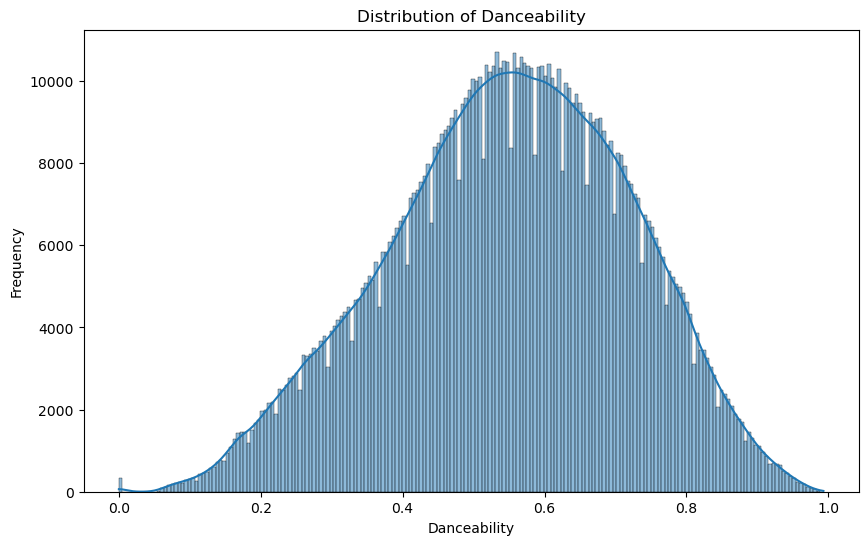

In [11]:
# distribution for danceability

plt.figure(figsize=(10,6))
sns.histplot(df['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

In [12]:
print(df['artists'].unique())

["['HELLYEAH']" 'Yxngxr1' "['Glowie']" ... "['Prasewon']"
 "['SoulkaOuter']" "['Jenkiss']"]


In [13]:
import re
df['artists'] = df['artists'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

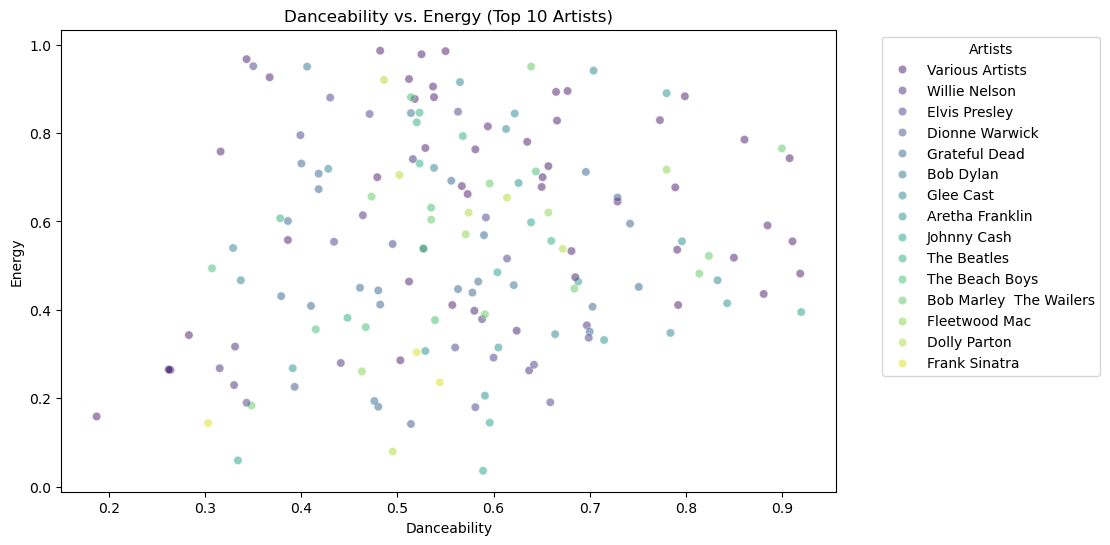

In [14]:
# Danceability vs. Energy (Top 10 Artists)

top_artists = df['artists'].value_counts().head(15).index 
subset_data = df[df['artists'].isin(top_artists)]

sample_subset_data = subset_data.sample(frac=0.01, random_state=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_subset_data, x='danceability', y='energy', hue='artists', palette='viridis', alpha=0.5)
plt.title('Danceability vs. Energy (Top 10 Artists)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Artists', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

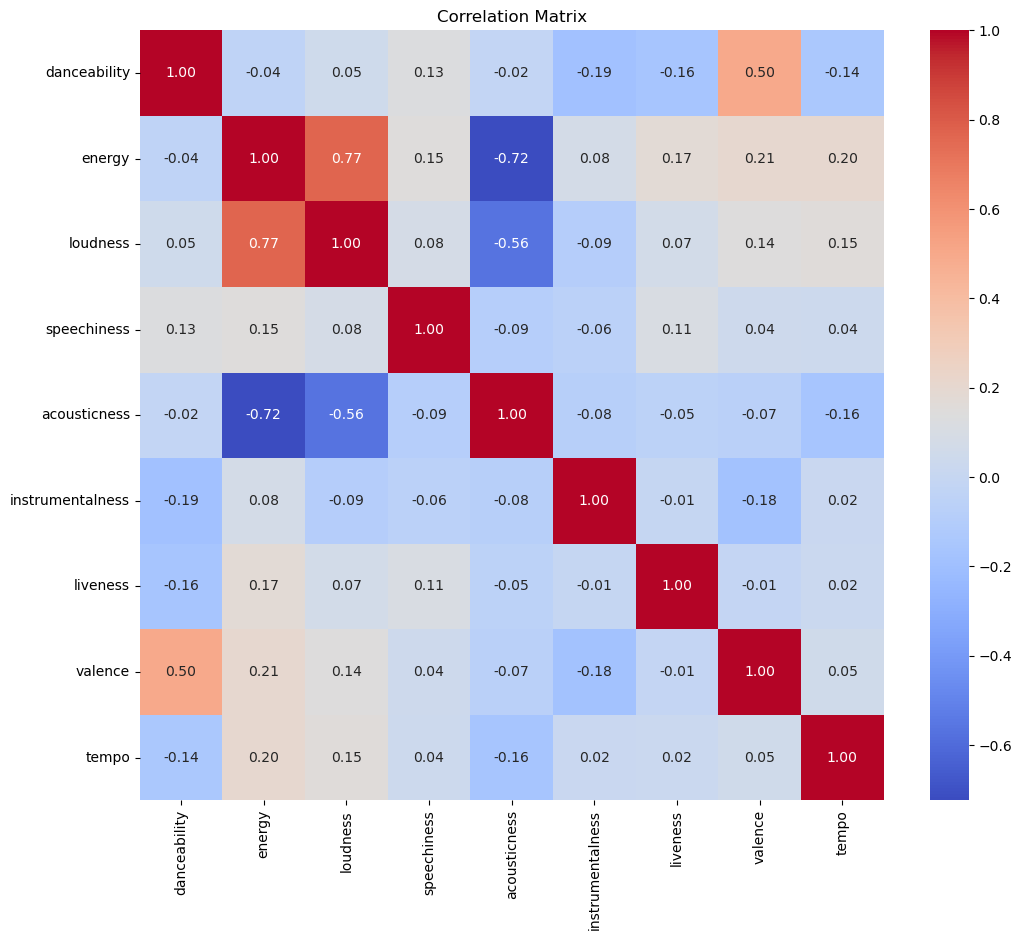

In [15]:
# correlation matrix

plt.figure(figsize=(12, 10))
correlation_matrix = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# nlp

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     Hostname mismatch, certificate is not valid for
[nltk_data]     'raw.githubusercontent.com'. (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     Hostname mismatch, certificate is not valid for
[nltk_data]     'raw.githubusercontent.com'. (_ssl.c:1000)>


False

In [18]:
def preprocess_lyrics(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [19]:
df['processed_lyrics'] = df['lyrics'].head(5000).apply(preprocess_lyrics)

In [20]:
df['processed_lyrics']

0         said came jamaica owned couple acres couple fa...
1         fucked bitch running kids said never listen ye...
2                                        oh god going crazy
3         continuamente se extraña la gente si puede ser...
4         continuamente se extraña la gente si puede ser...
                                ...                        
937969                                                  NaN
937970                                                  NaN
937971                                                  NaN
937972                                                  NaN
937973                                                  NaN
Name: processed_lyrics, Length: 937974, dtype: object

In [21]:
df['processed_lyrics'] = df['processed_lyrics'].fillna('').astype(str)

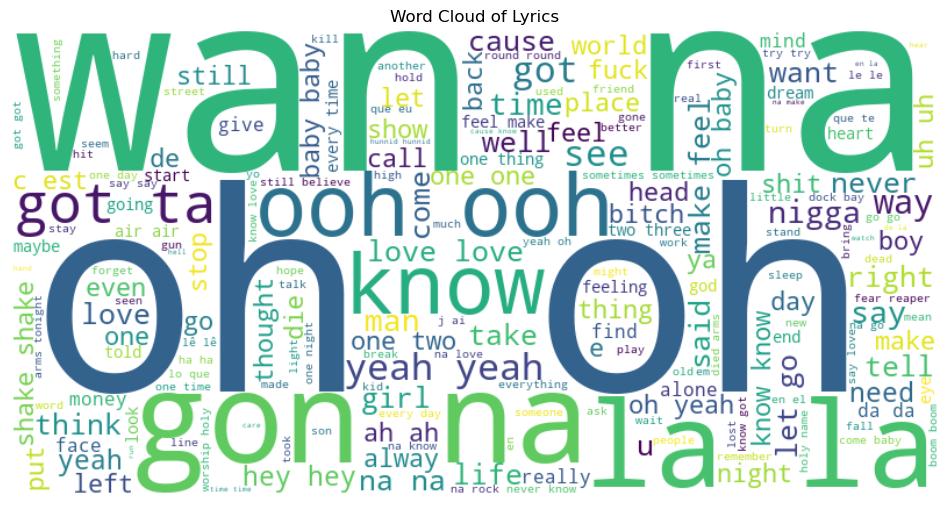

In [22]:
from wordcloud import WordCloud

df['processed_lyrics'] = df['processed_lyrics'].fillna('').astype(str)

all_lyrics = ' '.join(df['processed_lyrics'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()


In [23]:
df.head(10)

,id,name,album_name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,processed_lyrics
0,0Prct5TDjAnEgIqbxcldY9,!,UNDEN!ABLE,HELLYEAH,0.415,0.6050,7,-11.157,1,0.0575,0.001160,0.838000,0.4710,0.193,100.059,79500.0,"He said he came from Jamaica,\n he owned a cou...",said came jamaica owned couple acres couple fa...
1,2ASl4wirkeYm3OWZxXKYuq,!!,Unknown,Yxngxr1,0.788,0.6480,7,-9.135,0,0.3150,0.900000,0.000000,0.1760,0.287,79.998,114000.0,"Fucked a bitch, now she running with my kids\n...",fucked bitch running kids said never listen ye...
2,69lcggVPmOr9cvPx9kLiiN,!!! - Interlude,Where I Belong EP,Glowie,0.000,0.0354,7,-20.151,0,0.0000,0.908000,0.000000,0.4790,0.000,0.000,11413.0,"Oh, my God, I'm going crazy\n",oh god going crazy
3,4U7dlZjg1s9pjdppqZy0fm,!!De Repente!!,Un Palo Al Agua (20 Grandes Canciones),Rosendo,0.657,0.8820,5,-6.340,1,0.0385,0.007400,0.000013,0.0474,0.939,123.588,198173.0,Continuamente se extraña la gente si no puede ...,continuamente se extraña la gente si puede ser...
4,4v1IBp3Y3rpkWmWzIlkYju,!!De Repente!!,Fuera De Lugar,Rosendo,0.659,0.8930,5,-8.531,1,0.0411,0.092200,0.000019,0.0534,0.951,123.600,199827.0,Continuamente se extraña la gente si no puede ...,continuamente se extraña la gente si puede ser...
5,5tA3ImW310llKo8EMBj2Ga,!!Noble Stabbings!!,Unknown,Dillinger Four,0.171,0.9570,2,-5.749,1,0.1490,0.000029,0.000032,0.3300,0.349,175.317,197400.0,You like to stand on the other side\n Point an...,like stand side point laugh self satisfied lin...
6,0fROT4kK5oTm8xO8PX6EJF,!I'll Be Back!,!I'll Be Back!,Rilès,0.823,0.6120,1,-7.767,1,0.2480,0.168000,0.000000,0.1090,0.688,142.959,178533.0,"It's been a while, shit I missed the rehab, ps...",shit missed rehab psyche gone room rest demons...
7,1xBFhv5faebv3mmwxx7DnS,!Lost!,Unknown,Rilès,0.729,0.5520,7,-8.562,0,0.0650,0.183000,0.000000,0.1310,0.380,86.103,186197.0,I would like to give you all my time\n I would...,would like give time would like tell much love...
8,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,Unknown,Love,0.600,0.5400,9,-11.803,1,0.0328,0.525000,0.003050,0.1000,0.547,125.898,220560.0,With pictures and words\n Is this communicatin...,pictures words communicating sounds heard grow...
9,6LrefSCg9Vnn1ckCeJkmbA,!Viva el Mal Viva el Capital!,Unknown,Elektroduendes,0.530,0.9150,0,-7.502,1,0.0370,0.003180,0.000007,0.5930,0.819,120.179,121170.0,"Seré corta y clarividente, como el cerebro del...",seré corta clarividente como el cerebro del pr...


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = df.head(500)

features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

df['clusters'] = clusters

Text(0.5, 0, 'energy')

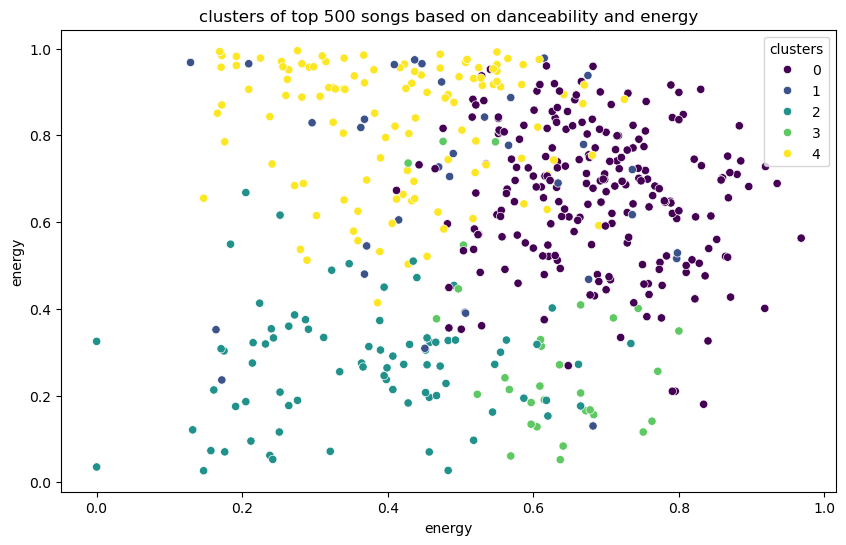

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'danceability', y = 'energy', hue = 'clusters', palette='viridis')
plt.title('clusters of top 500 songs based on danceability and energy')
plt.xlabel('danceability')
plt.xlabel('energy')